In [1]:
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from datetime import date
from numpy import log

sys.path.append(os.getcwd() + '/../..')
import macrodata as md

In [2]:
start_dt = date(2015, 1, 1)
end_dt = date(2023, 2, 1)

In [7]:
countries = ['China']
sub_asset_class = ['inflation']

In [8]:
items = md.Explorer.countrySubAssetList(countries, sub_asset_class)['China']

In [9]:
items

{'inflation': ['cny_cpi',
  'cny_cpi_food',
  'cny_cpi_clothing',
  'cny_cpi_residence',
  'cny_cpi_household',
  'cny_cpi_transport',
  'cny_cpi_education',
  'cny_cpi_health',
  'cny_cpi_misc']}

In [10]:
md.Explorer.desc(items['inflation'], start_dt, end_dt)

Total non NA data : 37
From 2020-01-31 to 2023-01-31
Theorical number of months : 37


last Date  last value n of values
manual cny_cpi            2023-01-31  102.790535          37
       cny_cpi_clothing   2023-01-31  101.079683          37
       cny_cpi_education  2023-01-31   105.29603          37
       cny_cpi_food       2023-01-31  104.081639          37
       cny_cpi_health     2023-01-31  102.018504          37
       cny_cpi_household  2023-01-31  102.113691          37
       cny_cpi_misc       2023-01-31  103.985936          37
       cny_cpi_residence  2023-01-31  100.497887          37
       cny_cpi_transport  2023-01-31   102.95076          37

In [11]:
db = md.Explorer.listHistory(items['inflation'], start_dt, end_dt)

In [12]:
china_cpi_YoY = db.dropna().apply(lambda x : log(x), axis = 1).diff(periods = 12).dropna()
china_cpi_MoM = db.dropna().apply(lambda x : log(x), axis = 1).diff(periods = 1).dropna()

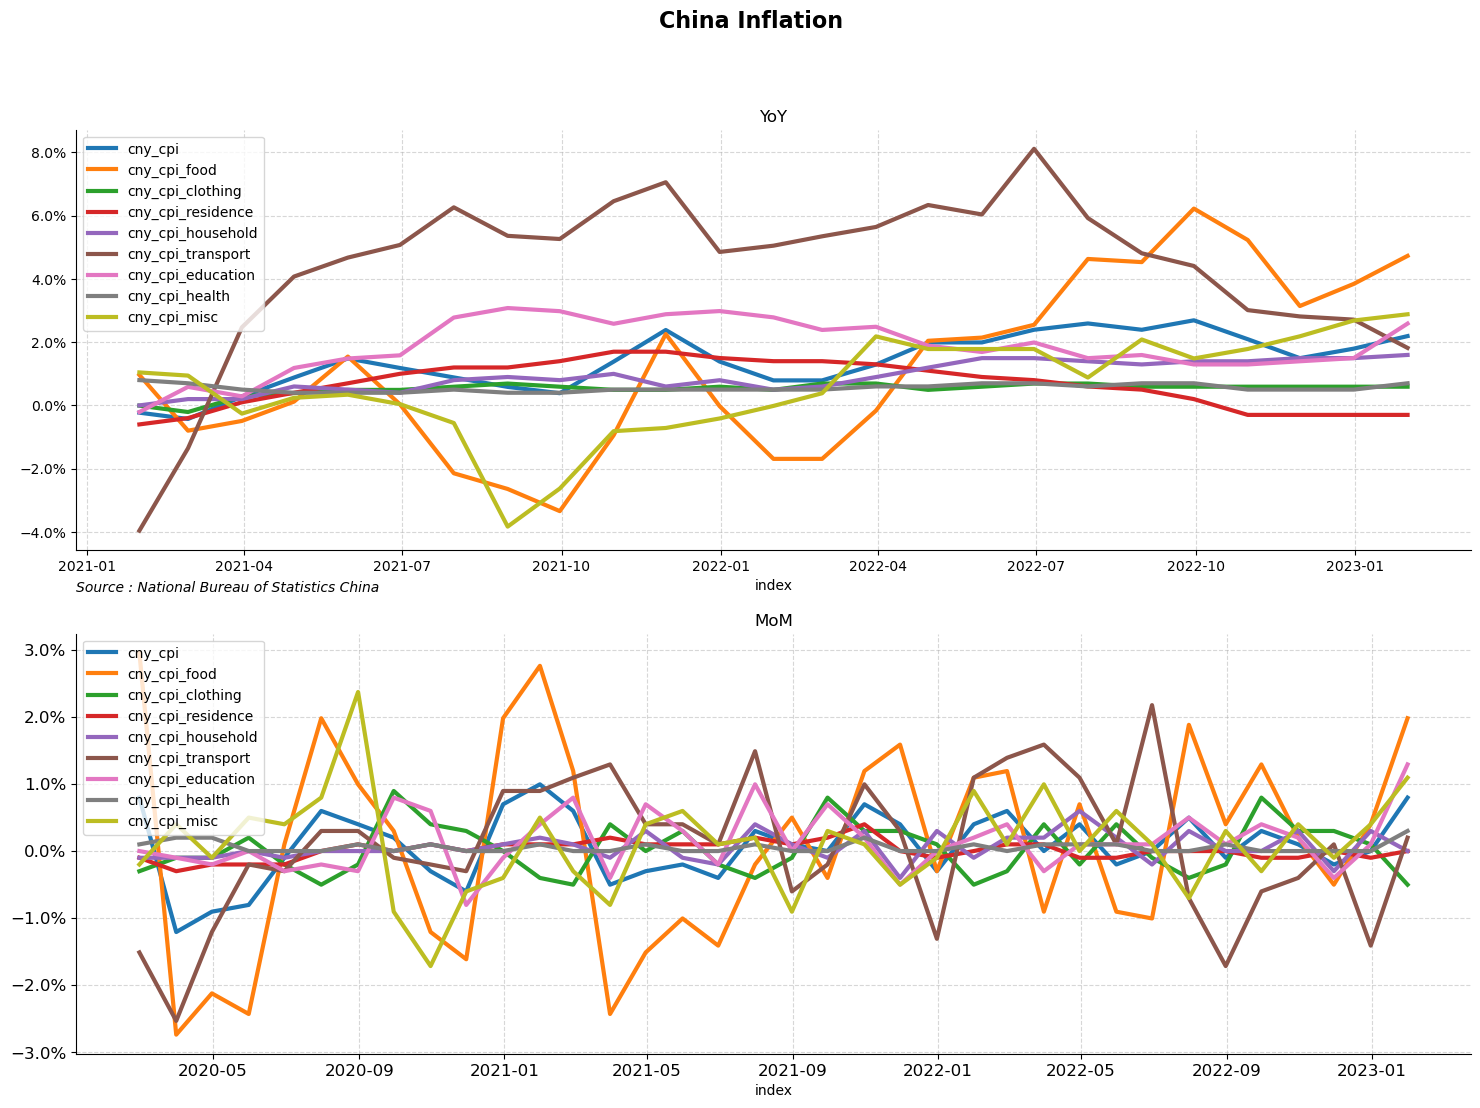

In [13]:
f, ax = plt.subplots(2,1, figsize=(18,12))
f.suptitle('China Inflation', fontsize = 16, fontweight = 'bold')

(china_cpi_YoY.iloc[-36:] * 100).plot(ax = ax[0], lw = 3, title = 'YoY')
(china_cpi_MoM.iloc[-36:] * 100).plot(ax = ax[1], lw = 3, title = 'MoM')


for a in ax :
    a.spines[['right', 'top']].set_visible(False)
    a.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))
    a.grid(alpha = 0.5, ls = '--')

void = plt.xticks(fontsize=12)
void = plt.yticks(fontsize=12)

void = ax[0].text(0, -0.1, 'Source : National Bureau of Statistics China',
              fontstyle = 'italic',
              transform = ax[0].transAxes)

# plt.savefig('../_data/figs/USInflation.jpg')